In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

%run 'parse.ipynb'

# Load data

In [2]:
datadir = 'Behavioral-Analyzed-Data/training/'

In [3]:
folders=[datadir+s for s in os.listdir(datadir) if len(s) <= 2]
len(folders)

20

In [4]:
subjects = pd.DataFrame(folders,columns=['folder'])
subjects.index = [int(s.split('/')[-1]) for s in subjects.folder]
subjects.sort_index(inplace=True)
subjects

,folder
1,Behavioral-Analyzed-Data/training/1
2,Behavioral-Analyzed-Data/training/2
3,Behavioral-Analyzed-Data/training/3
4,Behavioral-Analyzed-Data/training/4
5,Behavioral-Analyzed-Data/training/5
6,Behavioral-Analyzed-Data/training/6
7,Behavioral-Analyzed-Data/training/7
8,Behavioral-Analyzed-Data/training/8
9,Behavioral-Analyzed-Data/training/9
10,Behavioral-Analyzed-Data/training/10


In [5]:
subj = doparse(1)

In [6]:
subjects['data'] = [doparse(data_type = 'training', subj=i) for i in subjects.index]
subjects.head()

,folder,data
1,Behavioral-Analyzed-Data/training/1,<__main__.Subject object at 0x7f5c3457f690>
2,Behavioral-Analyzed-Data/training/2,<__main__.Subject object at 0x7f5c0fd8c6d0>
3,Behavioral-Analyzed-Data/training/3,<__main__.Subject object at 0x7f5c0fcc8110>
4,Behavioral-Analyzed-Data/training/4,<__main__.Subject object at 0x7f5c0fcc8290>
5,Behavioral-Analyzed-Data/training/5,<__main__.Subject object at 0x7f5c0fccb550>


# Dimensionality reduction

In [7]:
# A Reducer takes in a Subject object, defined above, and a bool "isPre"
# and returns a numpy vector.
# Eventually, it will have performed useful reduction in the process.

In [8]:
def nullRSreducer(subj, isPre = True):
    if isPre:
        return subj.Pre_RS.values.flatten()
    else:
        return subj.Post_RS.values.flatten()

In [9]:
def nullFSreducer(subj, isPre = True):
    if isPre:
        return subj.Pre_FS.values.flatten()
    else:
        return subj.Post_FS.values.flatten()

# Similarity Matrices

In [10]:
def dist_func(vect1, vect2):
    return np.linalg.norm(vect1 - vect2)

In [11]:
reducer = nullRSreducer

In [21]:
subjects['reducedPre'] = [reducer(subj, True) for subj in subjects.data]
subjects['reducedPost'] = [reducer(subj, False) for subj in subjects.data]
subjects.head()
# subjects

,folder,data,reducedPre,reducedPost
1,Behavioral-Analyzed-Data/training/1,<__main__.Subject object at 0x7f5c3457f690>,"[1.0, 0.037691, 0.067593, 0.65412, 0.71272, -0...","[1.0, 0.36789, 0.28777, 0.54925, 0.90469, 0.20..."
2,Behavioral-Analyzed-Data/training/2,<__main__.Subject object at 0x7f5c0fd8c6d0>,"[1.0, 0.46527, 0.42208, 0.37324, 0.59924, 0.27...","[1.0, 0.20989, 0.43422, 0.27855, 0.68751, 0.28..."
3,Behavioral-Analyzed-Data/training/3,<__main__.Subject object at 0x7f5c0fcc8110>,"[1.0, -0.27003, -0.16193, 0.26029, 0.66118, -0...","[1.0, -0.082703, -0.05483, 0.34584, 0.47792, -..."
4,Behavioral-Analyzed-Data/training/4,<__main__.Subject object at 0x7f5c0fcc8290>,"[1.0, 0.068626, 0.14524, 0.48957, 0.5788, 0.18...","[1.0, 0.55927, 0.43173, 0.52971, 0.83218, 0.37..."
5,Behavioral-Analyzed-Data/training/5,<__main__.Subject object at 0x7f5c0fccb550>,"[1.0, -0.35069, 0.29533, 0.20036, 0.83152, -0....","[1.0, -0.11591, -0.065677, 0.22849, 0.8104, 0...."


In [13]:
np.shape(subjects.reducedPost[2])

(77284,)

In [38]:
for i, j in enumerate(subjects.reducedPre):
    print i, np.count_nonzero(np.isnan(j))

0 0
1 0
2 0
3 0
4 0
5 0
6 555
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 0
15 0
16 0
17 0
18 0
19 0


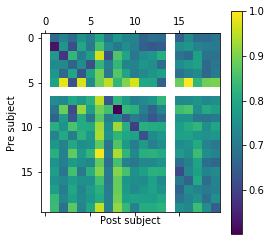

In [49]:
distMatrix = np.zeros([len(subjects), len(subjects)])
for i, pre in enumerate(subjects.reducedPre):
    for j, post in enumerate(subjects.reducedPost):
        distMatrix[i, j] = dist_func(pre, post)

distMatrix /= np.nanmax(distMatrix)

cax = plt.matshow(distMatrix)

plt.colorbar(cax)
# plt.title('Correlation between incomming and outgoing scans')
plt.xlabel('Post subject')
plt.ylabel('Pre subject')

plt.savefig('DistanceMap.png', dpi=500)

# Directionality modelling

# Results